In [3]:
# Hidden TimeStamp
import time, datetime
st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')
print('Last Run: {}'.format(st))

Last Run: 2016-01-30 13:31:36


In [5]:
# Run this cell only once
from IPython.display import clear_output
import pandas as pd

%cd ../
clear_output()

pd.set_option('display.max_columns', 9)
pd.set_option('precision', 4)

# Getting Started


## Using LamAna with Jupyter (recommended)

**LamAna was developed with visualization in mind**.  

LamAna works best with the [Jupter Notebook 4.0+ (formerly IPyhon 3.2+)](http://jupyter.org/).  Jupyter is a powerful analytical tool that performs computations in separated cells and integrates well with Python.  Plotting works best in Jupyter with some `matplotlib` backend initiated in a cell using idiomatic IPython magics e.g. `%matplotlib inline`.

The user starts by importing the desired Feature module, e.g. `distributions` for plots of stress or strain distributions. 


## Using LamAna from Commandline

If visualization is not important to you, you can still run calcuations and export data from the commandline.

We will now explore how the user can **input data** and **generate plots** using the `distributions` module.

##  User Setup

First we must input loading parameters and material pproperties.  Secondly, we must invoke a selected laminate theory.  The former requires knowlege of the specimen dimensions, the materials properties and loading configuration.  For illustration, an example schematic of laminate loading parameters is provided below.

![Loading Parameters](./_images/load_params.png)

A table is provided defining the illustrated parameters.  These loading parameters are coded in a dictionary called `load_params`. 

| Parameter | Units (SI) | Definition |
| :-------: | :--------: | :--------- |
| *P* | N | applied load |
| *R* | m | specimen radius | 
| *a* | m | support radius |
| *b* | m | piston radius |
| *r* | m | radial distance from central loading |
| *p* | - | graphical points or DataFrame rows per layer |

### User Defined Parameters

Sample code is provided for setting up geometric dimensions, loading parameters and material properties.

In [14]:
# SETUP -----------------------------------------------------------------------

import lamana as la

# For plotting in Jupyter
%matplotlib inline                                         

# Build dicts for loading parameters and material properties 
load_params = {
    'P_a': 1,                                              # applied load 
    'R': 12e-3,                                            # specimen radius
    'a': 7.5e-3,                                           # support radius 
    'p': 4,                                                # points/layer
    'r': 2e-4,                                             # radial distance from center loading
}

# Using Quick Form (See Standard Form)
mat_props = {
    'HA': [5.2e10, 0.25],                                  # modulus, Poissions
    'PSu': [2.7e9, 0.33],            
}

# Build a list of geometry strings to test.  Accepted conventions shown below:
# 'outer - [{inner...-...}_i] - middle'

geos1 = ['400-400-400', '400-200-800', '400-350-500']      # = total thickness
geos2 = ['400-[400]-400', '400-[200,100]-800']             # = outer thickness 
#------------------------------------------------------------------------------

## Generate Data in 3 Lines

With the **loading and material** information, we can make stress distribution plots to define (reusable) test **cases** by implementing 3 simple steps. 

1. *Instantiate* a Feature object with loading and material parameters (generates makes a user Case object) 
1. `apply()` a model to a test with desired geometries (assumes mirrored at the neutral axis)
1. `plot()` the case object based on the chosen feature

Once the parameters geometries are set, in three lines of code, you can build a case and simultaneiously plot stress distributions for an indefinite number of laminates varying in compostion and dimension within seconds.  Conveniently, the  outputs are common Python data structures, specifically `pandas` DataFrames and `matplotlib` graphical plots ready for data munging and analysis.

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


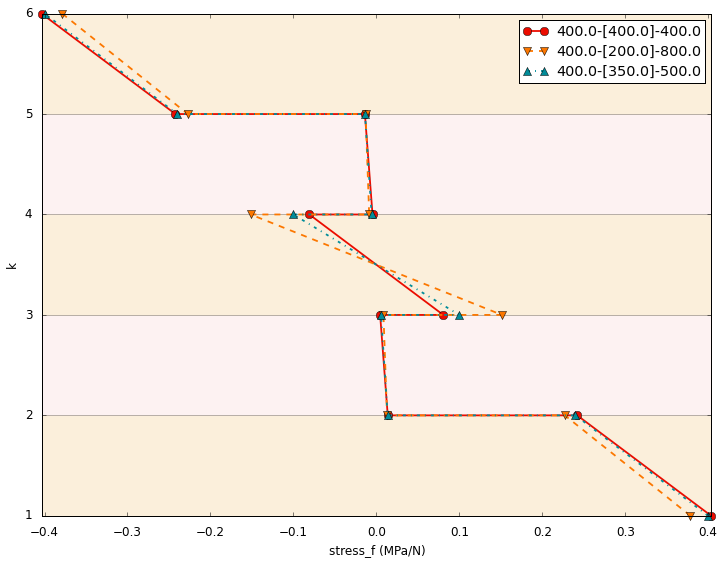

In [13]:
case1 = la.distributions.Case(load_params, mat_props)      # instantiate
case1.apply(geos1, model='Wilson_LT')                      # apply 
case1.plot()                                               # plot 

## Other Attributes

A case stores all of the laminate data for a particular set of parameters in two forms: a dict and a DataFrame (see tutorial for details). Once a case is built, there serveral covenient builtin attributes for accessing this data for further analysis.

```python
# Case Attributes
case.geometries                                            # geometry object
case.total                                                 # total laminate thickness (all)                
case.inner                                                 # layer thickness (all)    
case.total_inner                                           # total layer type (all) 
case.total_inner[0]                                        # slicing
case.total_inner_i                                         # total inner layers
case1.snapshot                                             # list of all geometry stacks (unique layers)
case1.frames                                               # list all DataFrames (all layers)
```

## Extensibile

**LamAna is extensible**.  Users can define custom or modified models based on laminate theory and apply these models to cases (see theories section for details).

```python
# Classical Laminate Theory
case2 = la.distributions(load_params, mat_props)           # instantiate 
case2.apply(geos2, model='Classic_LT')                     # apply model
case2.plot()

# Custom Biaxial Flexure Model
case3 = la.distributions(load_params, mat_props)           # instantiate 
case3.apply(geos2, model='Wilson_LT')                      # custom model
case3.plot()
```
We can perform sepearate analyses by building different cases and apply different models (default model: "Wilson_LT" for circular disks in biaxial flexure).